# بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيم

# Titanic Survival Data

## Data Description
(from https://www.kaggle.com/c/titanic)
survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name

sex: Sex

age: Age

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare

cabin: Cabin

embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**

Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 
2nd ~ Middle; 
3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent: Mother or Father of Passenger Aboard Titanic

Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-

laws. Some children travelled only with a nanny, therefore parch=0 for them. 

As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [715]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [716]:
titanic=pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [717]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Detail of data

In [718]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 1-Data Cleaning
We will check for NaN or Null values and also check if any of the columns need to be added of removed

In [719]:
#total nu of null values in each column
titanic.apply(lambda x: sum(x.isnull()),axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

we see that there are 177 missing values in "age" and "688" missing values in "deck".
First check the values in "deck"

In [720]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

**It seems that there is no need for "deck" values as more than 40% are missing.So we remove "deck" field. Also we remove the 'alive' column**

In [721]:
#removed unwanted columns
def remove_columns(df,column):
    return df.drop(column,inplace=True,axis=1)

remove_columns(titanic,'alive')
remove_columns(titanic,'deck')

**Number of Men, Women and Children**

In [722]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [723]:
xs=[i+0.8 for i,_ in enumerate(titanic['who'])]

[0.8,
 1.8,
 2.8,
 3.8,
 4.8,
 5.8,
 6.8,
 7.8,
 8.8,
 9.8,
 10.8,
 11.8,
 12.8,
 13.8,
 14.8,
 15.8,
 16.8,
 17.8,
 18.8,
 19.8,
 20.8,
 21.8,
 22.8,
 23.8,
 24.8,
 25.8,
 26.8,
 27.8,
 28.8,
 29.8,
 30.8,
 31.8,
 32.8,
 33.8,
 34.8,
 35.8,
 36.8,
 37.8,
 38.8,
 39.8,
 40.8,
 41.8,
 42.8,
 43.8,
 44.8,
 45.8,
 46.8,
 47.8,
 48.8,
 49.8,
 50.8,
 51.8,
 52.8,
 53.8,
 54.8,
 55.8,
 56.8,
 57.8,
 58.8,
 59.8,
 60.8,
 61.8,
 62.8,
 63.8,
 64.8,
 65.8,
 66.8,
 67.8,
 68.8,
 69.8,
 70.8,
 71.8,
 72.8,
 73.8,
 74.8,
 75.8,
 76.8,
 77.8,
 78.8,
 79.8,
 80.8,
 81.8,
 82.8,
 83.8,
 84.8,
 85.8,
 86.8,
 87.8,
 88.8,
 89.8,
 90.8,
 91.8,
 92.8,
 93.8,
 94.8,
 95.8,
 96.8,
 97.8,
 98.8,
 99.8,
 100.8,
 101.8,
 102.8,
 103.8,
 104.8,
 105.8,
 106.8,
 107.8,
 108.8,
 109.8,
 110.8,
 111.8,
 112.8,
 113.8,
 114.8,
 115.8,
 116.8,
 117.8,
 118.8,
 119.8,
 120.8,
 121.8,
 122.8,
 123.8,
 124.8,
 125.8,
 126.8,
 127.8,
 128.8,
 129.8,
 130.8,
 131.8,
 132.8,
 133.8,
 134.8,
 135.8,
 136.8,
 137.8,
 138.8

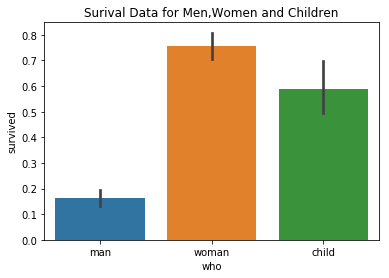

In [724]:
sns.barplot(data=titanic,x=titanic['who'],y=titanic.survived)
plt.title('Surival Data for Men,Women and Children')

## There are 177 null values in age which can effect our results.So we have to fill these values by appropiate value

In [725]:
#first we find the mean
titanic['age'].mean()

29.69911764705882

**The mean is 29 but we cant fill all the 177 values by 29 as there can be many children among these 177 values.Let us check the median**

In [726]:
titanic['age'].median()

28.0

**..Median is also same as the mean.we cant fill all the 177 values by 28 as there can be many children among these 177 values.So now check how many children are there **

In [727]:
# we see that the 'who' column tells us whether the entry if of 'man' , 'woman' or 'child'.
#so we check the number of children here

In [728]:
def count_values(df,col_name):
    return df[col_name].value_counts()
count_values(titanic,'who')

man      537
woman    271
child     83
Name: who, dtype: int64

Number of children is 83 so we cannot fill the NaN values by media=28 or mean=29.We can fill the NaN entries with median if we have adult 'man' or 'woman'.
Let us check the NaN entries in titanic['age'] corressponding to titanic['who']='child

** Checking how many Children have missing values**

In [729]:
titanic.loc[titanic['who']=='child'].isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

We see that none of the 83 children have NaN values in their respective age column.
So its same to replace missing values of age with median =28

In [730]:
titanic['age'].fillna(titanic['age'].median(),inplace=True)

In [731]:
#total nu of null values in each column
titanic.apply(lambda x :sum(x.isnull()),axis=0)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [737]:
#making a new variable for Gender
titanic['Sex_integer']=np.where(titanic.sex=='male',1,0)

In [738]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True,1


In [747]:
# convert floats to integer
titanic['age']=titanic['age'].astype(int)

# Observations

##  Total Number of  male and female

In [379]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

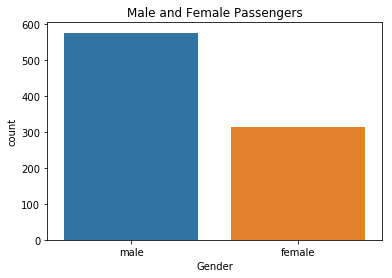

In [380]:
sns.countplot(x=titanic['sex'],data=titanic)
plt.xlabel('Gender')
plt.title('Male and Female Passengers')

##  No of adult male,adult female and children

In [381]:
titanic_gender_pivot=titanic.pivot_table('sex', 'who',aggfunc='count')
titanic_gender_pivot

,sex
who,
child,83
man,537
woman,271


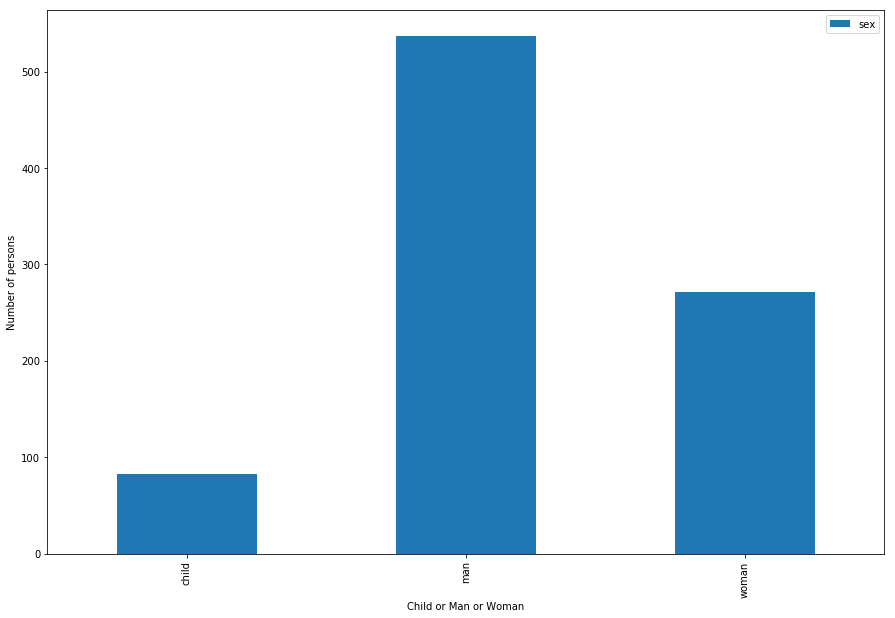

In [382]:
titanic_gender_pivot.plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of persons')
plt.xlabel('Child or Man or Woman')

# Age distribution

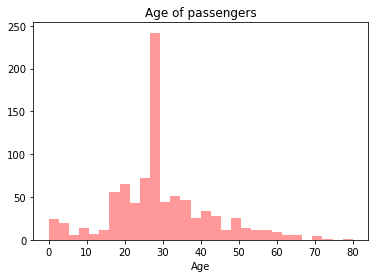

In [383]:
sns.distplot(titanic['age'],color='red',kde=False)
plt.xlabel('Age')
plt.title('Age of passengers')

** Most of the age distribution is between 20 and 40.The peak 28 is actually the number of filled missing values with the median**

# Question : Is there relation between "Survival" and "Gender"

In [384]:
titanic_male_female=titanic.pivot_table('survived','sex',aggfunc='sum')
titanic_male_female

,survived
sex,
female,233
male,109


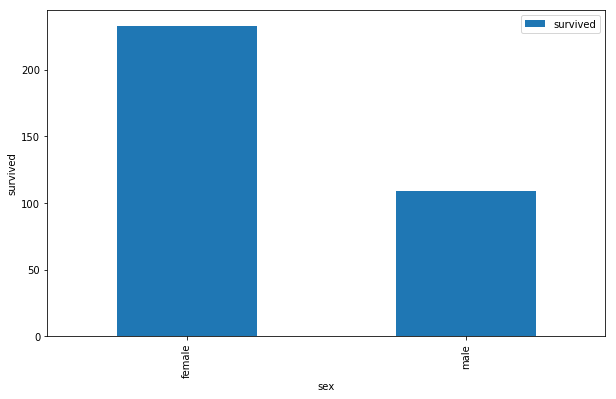

In [386]:
titanic_male_female.plot(kind='bar',figsize=(10,6))
plt.ylabel('survived')

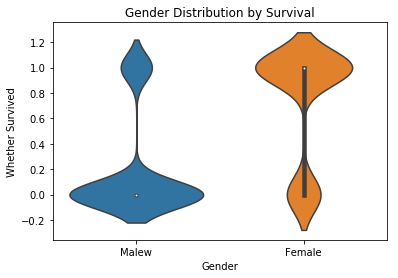

In [739]:
p = sns.violinplot(data = titanic, x = 'sex' , y ='survived')
p.set(title = 'Gender Distribution by Survival', 
        xlabel = 'Gender', 
        ylabel = 'Whether Survived', 
        xticklabels = ['Male', 'Female']);
plt.show()

## Above calculation and graph shows that female had more chance of survival

# Question-2 : is the econmoic condition of the passengers play any role in the survival?
## We will solve this in two parts
## First : We check the survival related to Cabins(i.e First,Second & Third class
## Second : We We check the survival related to the fare


In [388]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Sex_integer
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,False,1
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,False,0
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,True,0
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,False,0
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,True,1


In [749]:
def percentage_survival_by_two_factors(data,factor1,factor2):
    
    return data.pivot_table('survived',factor1,factor2)*100
 

In [750]:
# finding survival percentage between class and gender
survival_class_gender=percentage_survival_by_two_factors(titanic,'class','sex')
survival_class_gender

sex,female,male
class,,
First,96.808511,36.885246
Second,92.105263,15.740741
Third,50.000000,13.544669


** We see that 96% of female and 35% of male survived compared to 50% and 13% respectively in the third class**

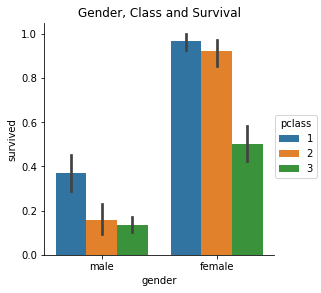

In [778]:
g=sns.factorplot(x='sex',
                y='survived',hue='pclass' , kind='bar',data=titanic)
# Fix up the labels
g.set(xlabel='gender',ylabel='survived', title='Gender, Class and Survival'
)

plt.show()

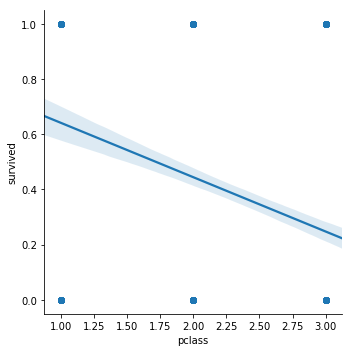

In [392]:
def sns_lmplot(x,y,data):
    sns.lmplot(x,y,data)
    return plt.show()
sns_lmplot(x='pclass',y='survived',data=titanic)

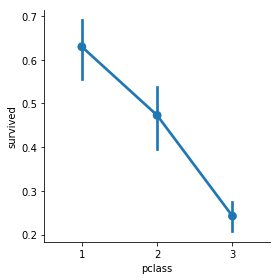

In [393]:
sns.factorplot('pclass','survived',data=titanic)


** Above plot and calculations shows that First Class had more chance of survival compared to Third Class.After First Class, the Second Class had more chance of survival.Third class had the least chance of survival**

Both Male and Female have higher chance of survival in the upper class as the data shows .

All bove plots shows that Higher Cabin class has more chance of survival

## Second :Now we check the survival with the fares

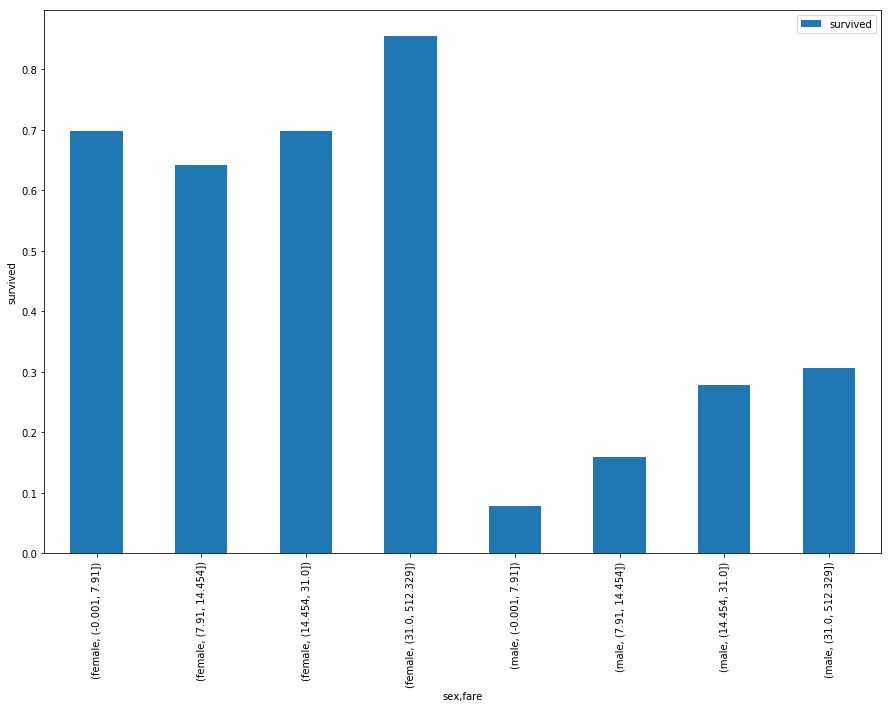

In [396]:
fare = pd.qcut(titanic['fare'], 4)
tt=titanic.pivot_table('survived',['sex',fare])
tt.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')
plt.show()

Above graph shows that people paying higher fare had more survival chance.This is because they were in Upper Class.We already showed that upper class had more chances of survival

** I will divide age in two groups i.e 0-18 and 18-80 for females and males **

In [397]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)
titanic_fare=titanic.pivot_table('survived', ['sex', age], 'class',aggfunc='mean')
titanic_fare

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.487805
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.750000  0.500000  0.200000
       (18, 80]  0.350427  0.086022  0.121622

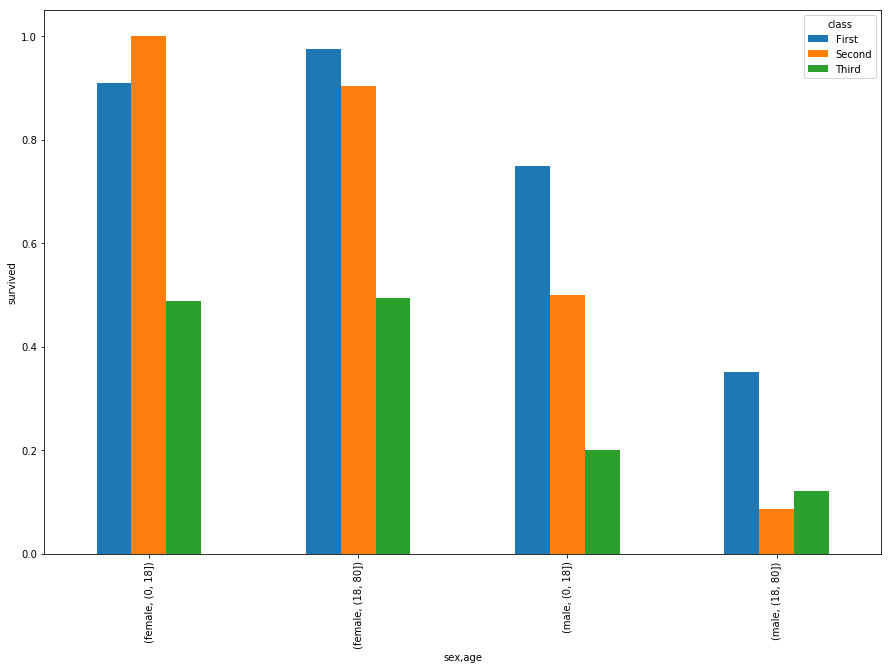

In [398]:
titanic_fare.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')

We see that the chances for survival in Class-3 is lower for all age and sex groups except for males between 18 and 80 years where Class-2 survival is higher than class-3
Men of all age groups have high survival in upper class
Women of 

** The above graph again shows that first class had more chance of survival in all the above age groups ** 

# Which age group has more survival chance?

In [492]:
age_groups = pd.cut(titanic['age'], [0,20,40,60,81])
survival_by_age_gender=titanic.pivot_table('survived', ['sex', age_groups])*100
survival_by_age_gender

survived
sex    age                 
female (0, 20]    68.000000
       (20, 40]   75.661376
       (40, 60]   75.555556
       (60, 81]  100.000000
male   (0, 20]    24.489796
       (20, 40]   16.577540
       (40, 60]   19.753086
       (60, 81]   10.526316

In [494]:
survival_by_age_total=titanic.pivot_table('survived', age_groups)*100
survival_by_age_total

,survived
age,
"(0, 20]",43.352601
"(20, 40]",36.412078
"(40, 60]",39.682540
"(60, 81]",22.727273


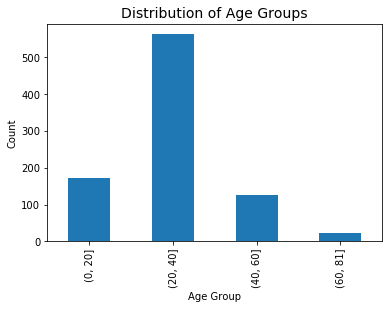

In [503]:
age_groups = pd.cut(titanic['age'], [0,20,40,60,81])
titanic.groupby(age_groups).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

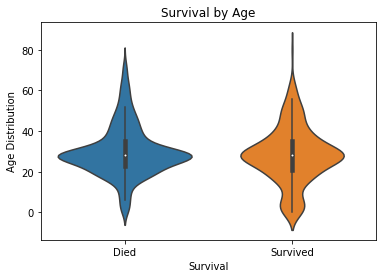

In [501]:
p = sns.violinplot(data = titanic, x = 'survived', y = 'age')
p.set(title = 'Survival by Age', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);
plt.show()

** Above observations show that age group between 20 and 40 has more chance of survival **

# Question : What is the survival chance for lonely passengers?

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

In [806]:
titanic.pivot_table('survived' ,'alone' ,aggfunc='count')

,survived
alone,
False,354
True,537


** So majority of passengers with a companion survived**

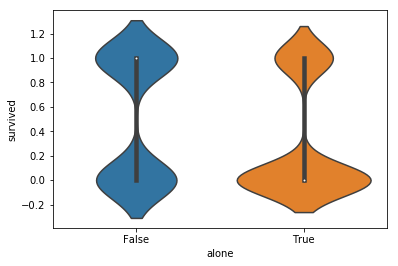

In [804]:
ax = sns.violinplot(x="alone", y="survived", data=titanic)

** Above graph shows that Lonely passengers had less chance of survival**

# Question : What is survival chance for children without parents?

In [809]:
titanic['child']=np.where(titanic.who=='child',1,0)
titanic['parents']=np.where(titanic.parch!=0,1,0)

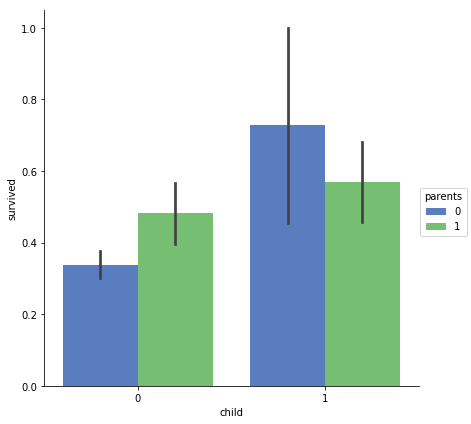

In [816]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="child", y="survived", hue="parents", data=titanic,
                   size=6, kind="bar", palette="muted",
                   )

** The above graph shows that children with parents had more chance of survival compared to children without parents or with nannies **

** Above calculations shows that lonely passengers had less chance of survival **

# Conclusions

## 1-Females had more survival chance than the male
## 2-First class passengers had more survival chance than the lower classes (economic factor)
## 3-More passengers who paid higer fares survived (also economic factor)
## 4-Age group between 20 and 40 had highest surival chance
## 5-Lonely passengers had less survival chance than those travelling with companions
## 6-More children died who were travelling without parents 


## references:
** https://www.oreilly.com/learning/pivot-tables **

** https://elitedatascience.com/python-seaborn-tutorial
 
** http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
 
** https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/ **
 
 ** http://pbpython.com/pandas-pivot-table-explained.html **
 ** https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/ **
                